# Waffle Chart


kita akan menggunakan data imigrasi Canada untuk membuat sebuah waffle chart


In [6]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use(['ggplot'])

In [5]:
# import data
df_can = pd.read_excel('../dataset/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)

df_can = df_can.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'])
df_can = df_can.rename(columns={
                       'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region', 'DevName': 'Dev'})
df_can = df_can.set_index('Country')

df_can.head()


,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [8]:
years = range(1980, 2014)

df_ims = df_can.loc[["Indonesia", "Malaysia", "Singapore"]]
df_ims["Total"] = df_ims[years].sum(axis=1)

df_ims.head()


,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,...,632,613,657,661,504,712,390,395,387,13150
Malaysia,Asia,South-Eastern Asia,Developing regions,786,816,813,448,384,374,425,...,593,580,600,658,640,802,409,358,204,24417
Singapore,Asia,South-Eastern Asia,Developing regions,241,301,337,169,128,139,205,...,392,298,690,734,366,805,219,146,141,14579


In [10]:
# hitung proporsi Total imigran per negara

grand_total = df_ims["Total"].sum()

df_ims["Proporsi"] = df_ims["Total"] / grand_total

df_ims[["Total", "Proporsi"]]


,Total,Proporsi
Country,,
Indonesia,13150,0.252177
Malaysia,24417,0.468243
Singapore,14579,0.279580


In [12]:
# pilih ukuran waffle chart, dan hitung masing2 dapat berapa kotak
width = 30
height = 10

total_tiles = width * height

df_ims["Tiles"] = round(df_ims["Proporsi"] * total_tiles)

df_ims[["Proporsi", "Tiles"]]


,Proporsi,Tiles
Country,,
Indonesia,0.252177,76.0
Malaysia,0.468243,140.0
Singapore,0.279580,84.0


In [13]:
df_ims[["Tiles"]].sum()


Tiles    300.0
dtype: float64

In [16]:
# Mempersiapkan Waffle Chart

tiles_per_category = df_ims["Tiles"] # jumlah tile per katergori

waffle_chart = np.zeros((height, width)) # waffle chart kosong

cat_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:cat_index]):
            # ...proceed to the next category
            cat_index += 1

        # kita isi 1 ubin di dalam matrix waffle chart kosong nya ke kategori tertentu
        waffle_chart[row, col] = cat_index

print('Waffle chart populated!')


Waffle chart populated!


Text(0.5, 1.0, 'Waffle Chart total Imigran yang pindah ke Canada selama 1980-2013')

<Figure size 640x480 with 0 Axes>

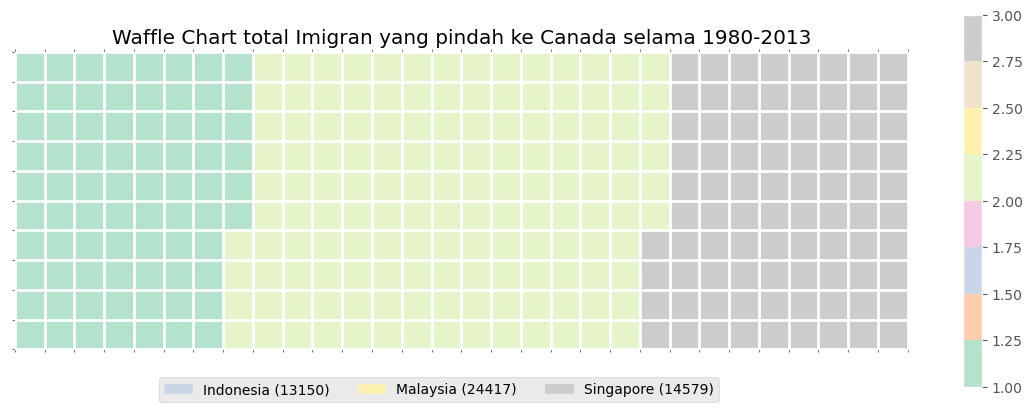

In [23]:
# waffle_chart dimulai dari

# Figure Waffle Chart
fig = plt.figure()

# Pemilihan warna
colormap = plt.cm.Pastel2
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Pembuatan grid kotak2 yang pas
ax = plt.gca()

# 1 ubin dibuat ukuran 1 tinggi dan lebar sama
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# tambahin kotak2nya
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])


# membuat legend yang sesuai warna apa dengan label apa
values_cumsum = np.cumsum(df_ims['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_ims.index.values):
    label_str = category + ' (' + str(df_ims['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_ims.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

plt.title("Waffle Chart total Imigran yang pindah ke Canada selama 1980-2013")

In [ ]:
# break 5 menit sampai jam 19.31 lalu ke Word Cloud